## Data Cleaning / transformation

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [6, 2]

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('../data/origin/BankChurners.csv')
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


The owner of this dataset advise to drop the last two columns, since they are irrelevant.
I'm also dropping CLIENTNUM

In [3]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
        'CLIENTNUM'], axis=1, inplace=True)
df.columns = df.columns.str.lower()
df.head(2)

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [4]:
df.to_csv('../data/clean/data_cleaned.csv', index=False)

In [5]:
df.shape

(10127, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [7]:
columns = ['attrition_flag', 'gender', 'education_level', 'marital_status', 'income_category', 'card_category']
[print(f'{c}\n {df[c].unique()}\n \n-------------\n') for c in columns]

attrition_flag
 ['Existing Customer' 'Attrited Customer']
 
-------------

gender
 ['M' 'F']
 
-------------

education_level
 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
 
-------------

marital_status
 ['Married' 'Single' 'Unknown' 'Divorced']
 
-------------

income_category
 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
 
-------------

card_category
 ['Blue' 'Gold' 'Silver' 'Platinum']
 
-------------



[None, None, None, None, None, None]

In [8]:
print(df.describe())

       customer_age  dependent_count  months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       total_relationship_count  months_inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [11]:
df.columns

Index(['attrition_flag', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [16]:
cat = ['attrition_flag', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon'
       ]

num = [ 'months_on_book', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'customer_age'
       ]

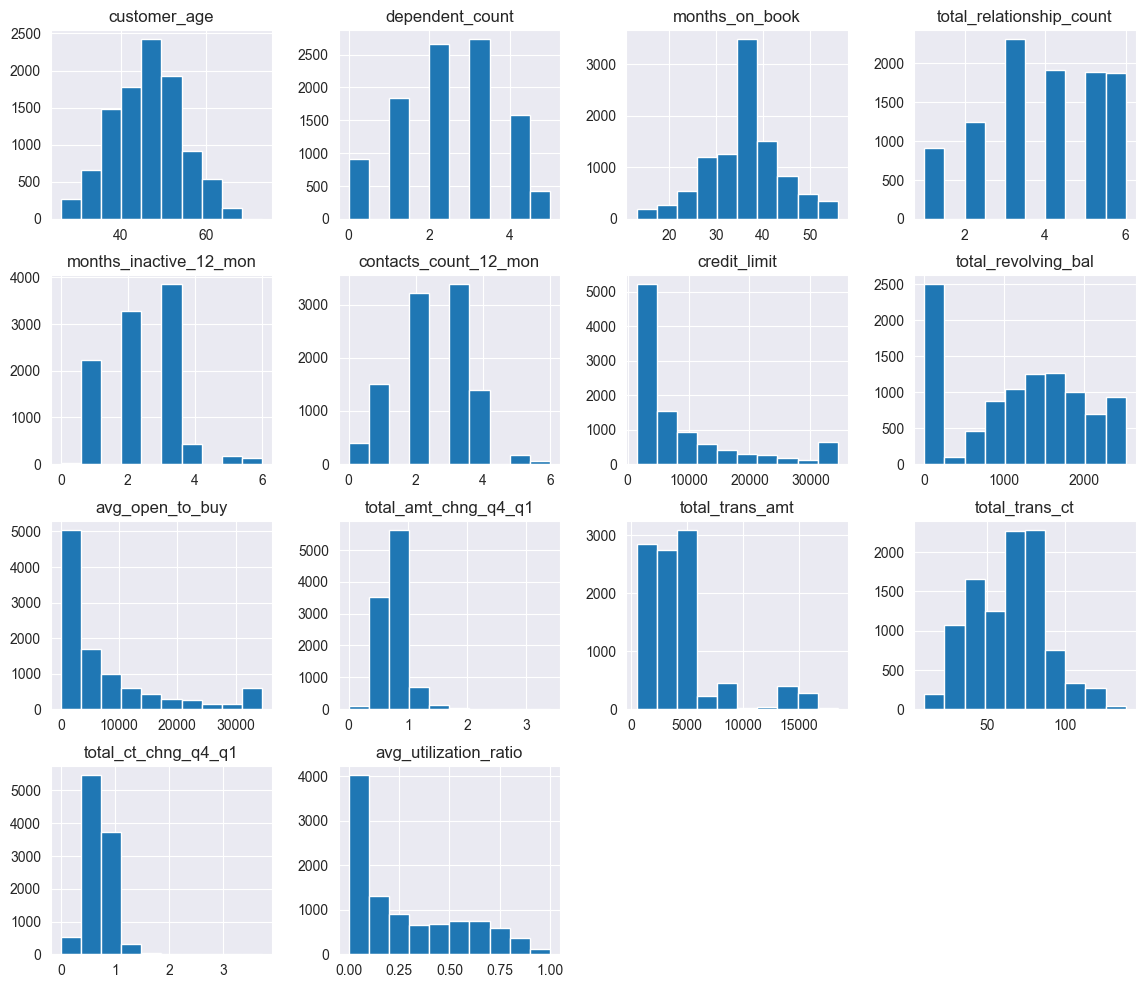

In [13]:
# Histogram of numerical values
df.hist(figsize=(14, 12))

plt.show()

In [14]:
def distribuition_subplot_cat(df, col, hue):
    palette = ['#ffa07a', '#b8336a']
    plt.subplots(6,2, figsize=(14, 40))
    for i in enumerate(col):
        plt.subplot(6, 2, i[0]+1)
        sns.countplot(data=df, x=i[1], color='lightsalmon', palette=palette, hue=hue)
        plt.xticks(rotation=10)
        plt.title(f'Categorical distribuition \n {i[1]}')
        plt.xlabel(None)
        plt.ylabel(None)
    plt.show()

def distribuition_subplot_num(df, col, hue, multiple='dodge'):
    palette = ['#ffa07a', '#b8336a']
    plt.subplots(5,2, figsize=(40, 60))
    for i in enumerate(col):
        plt.subplot(5, 2, i[0]+1)
        sns.histplot(data=df, x=i[1], color='lightsalmon', palette=palette, hue=hue, multiple=multiple)
        plt.xticks(rotation=10)
        plt.title(f'Numerical distribuition \n {i[1]}')
        plt.xlabel(None)
        plt.ylabel(None)
plt.show()


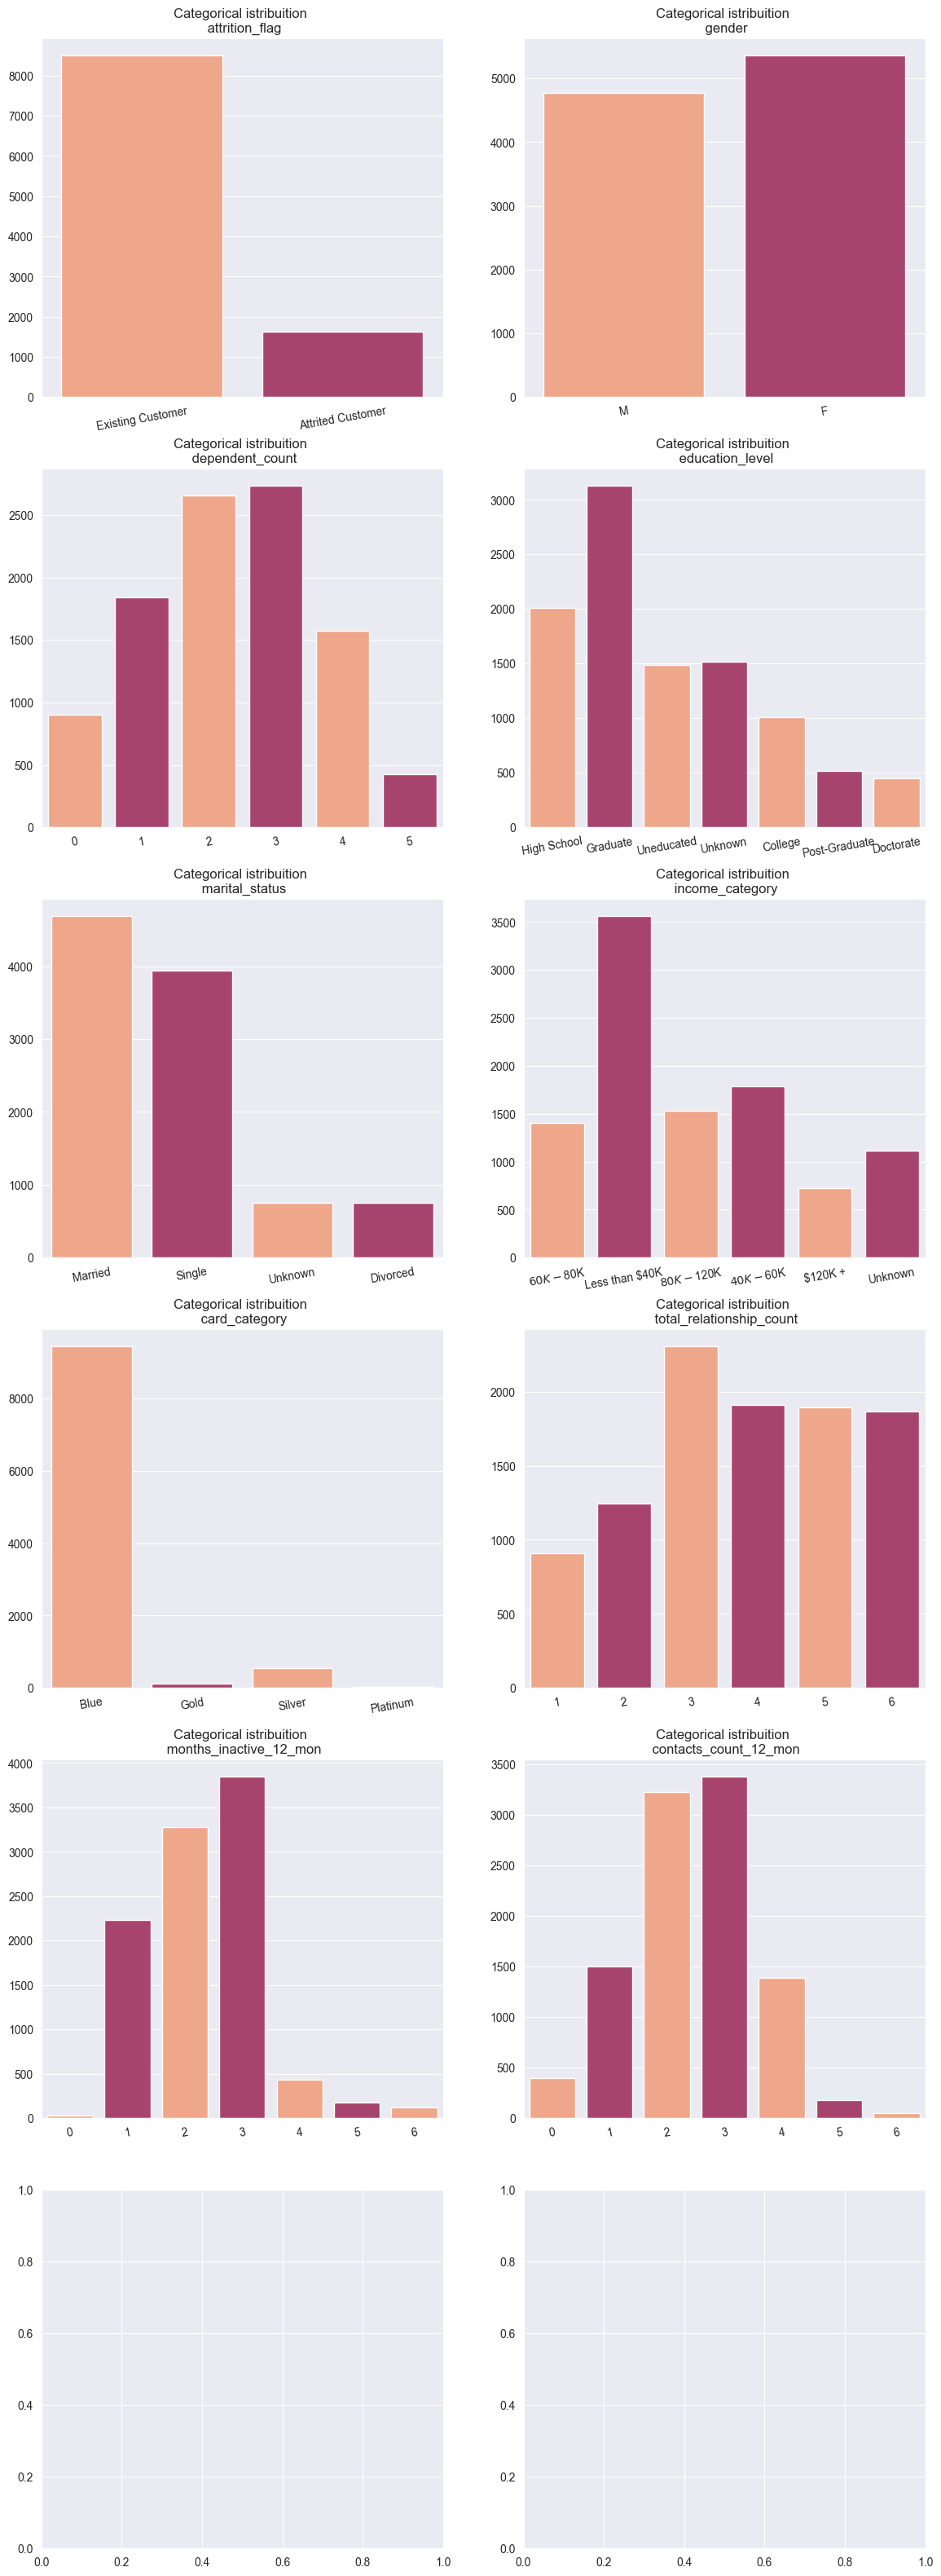

In [17]:
distribuition_subplot_cat(df, cat, None)

Observations:

- The target column is very umbalanced.
- *Gender* is quite balanced, having slidly more women than men.
- The vast majority of clients are 'educated' being *high scholl* and *graduate* the most populate. *uneducated* and *unknown* have both almost the same amount.
- *Married* and *single* sums more that 80% of the total.
- *less than 40k* leads the rank.
- The vast majority of clients have the regular card: *blue*

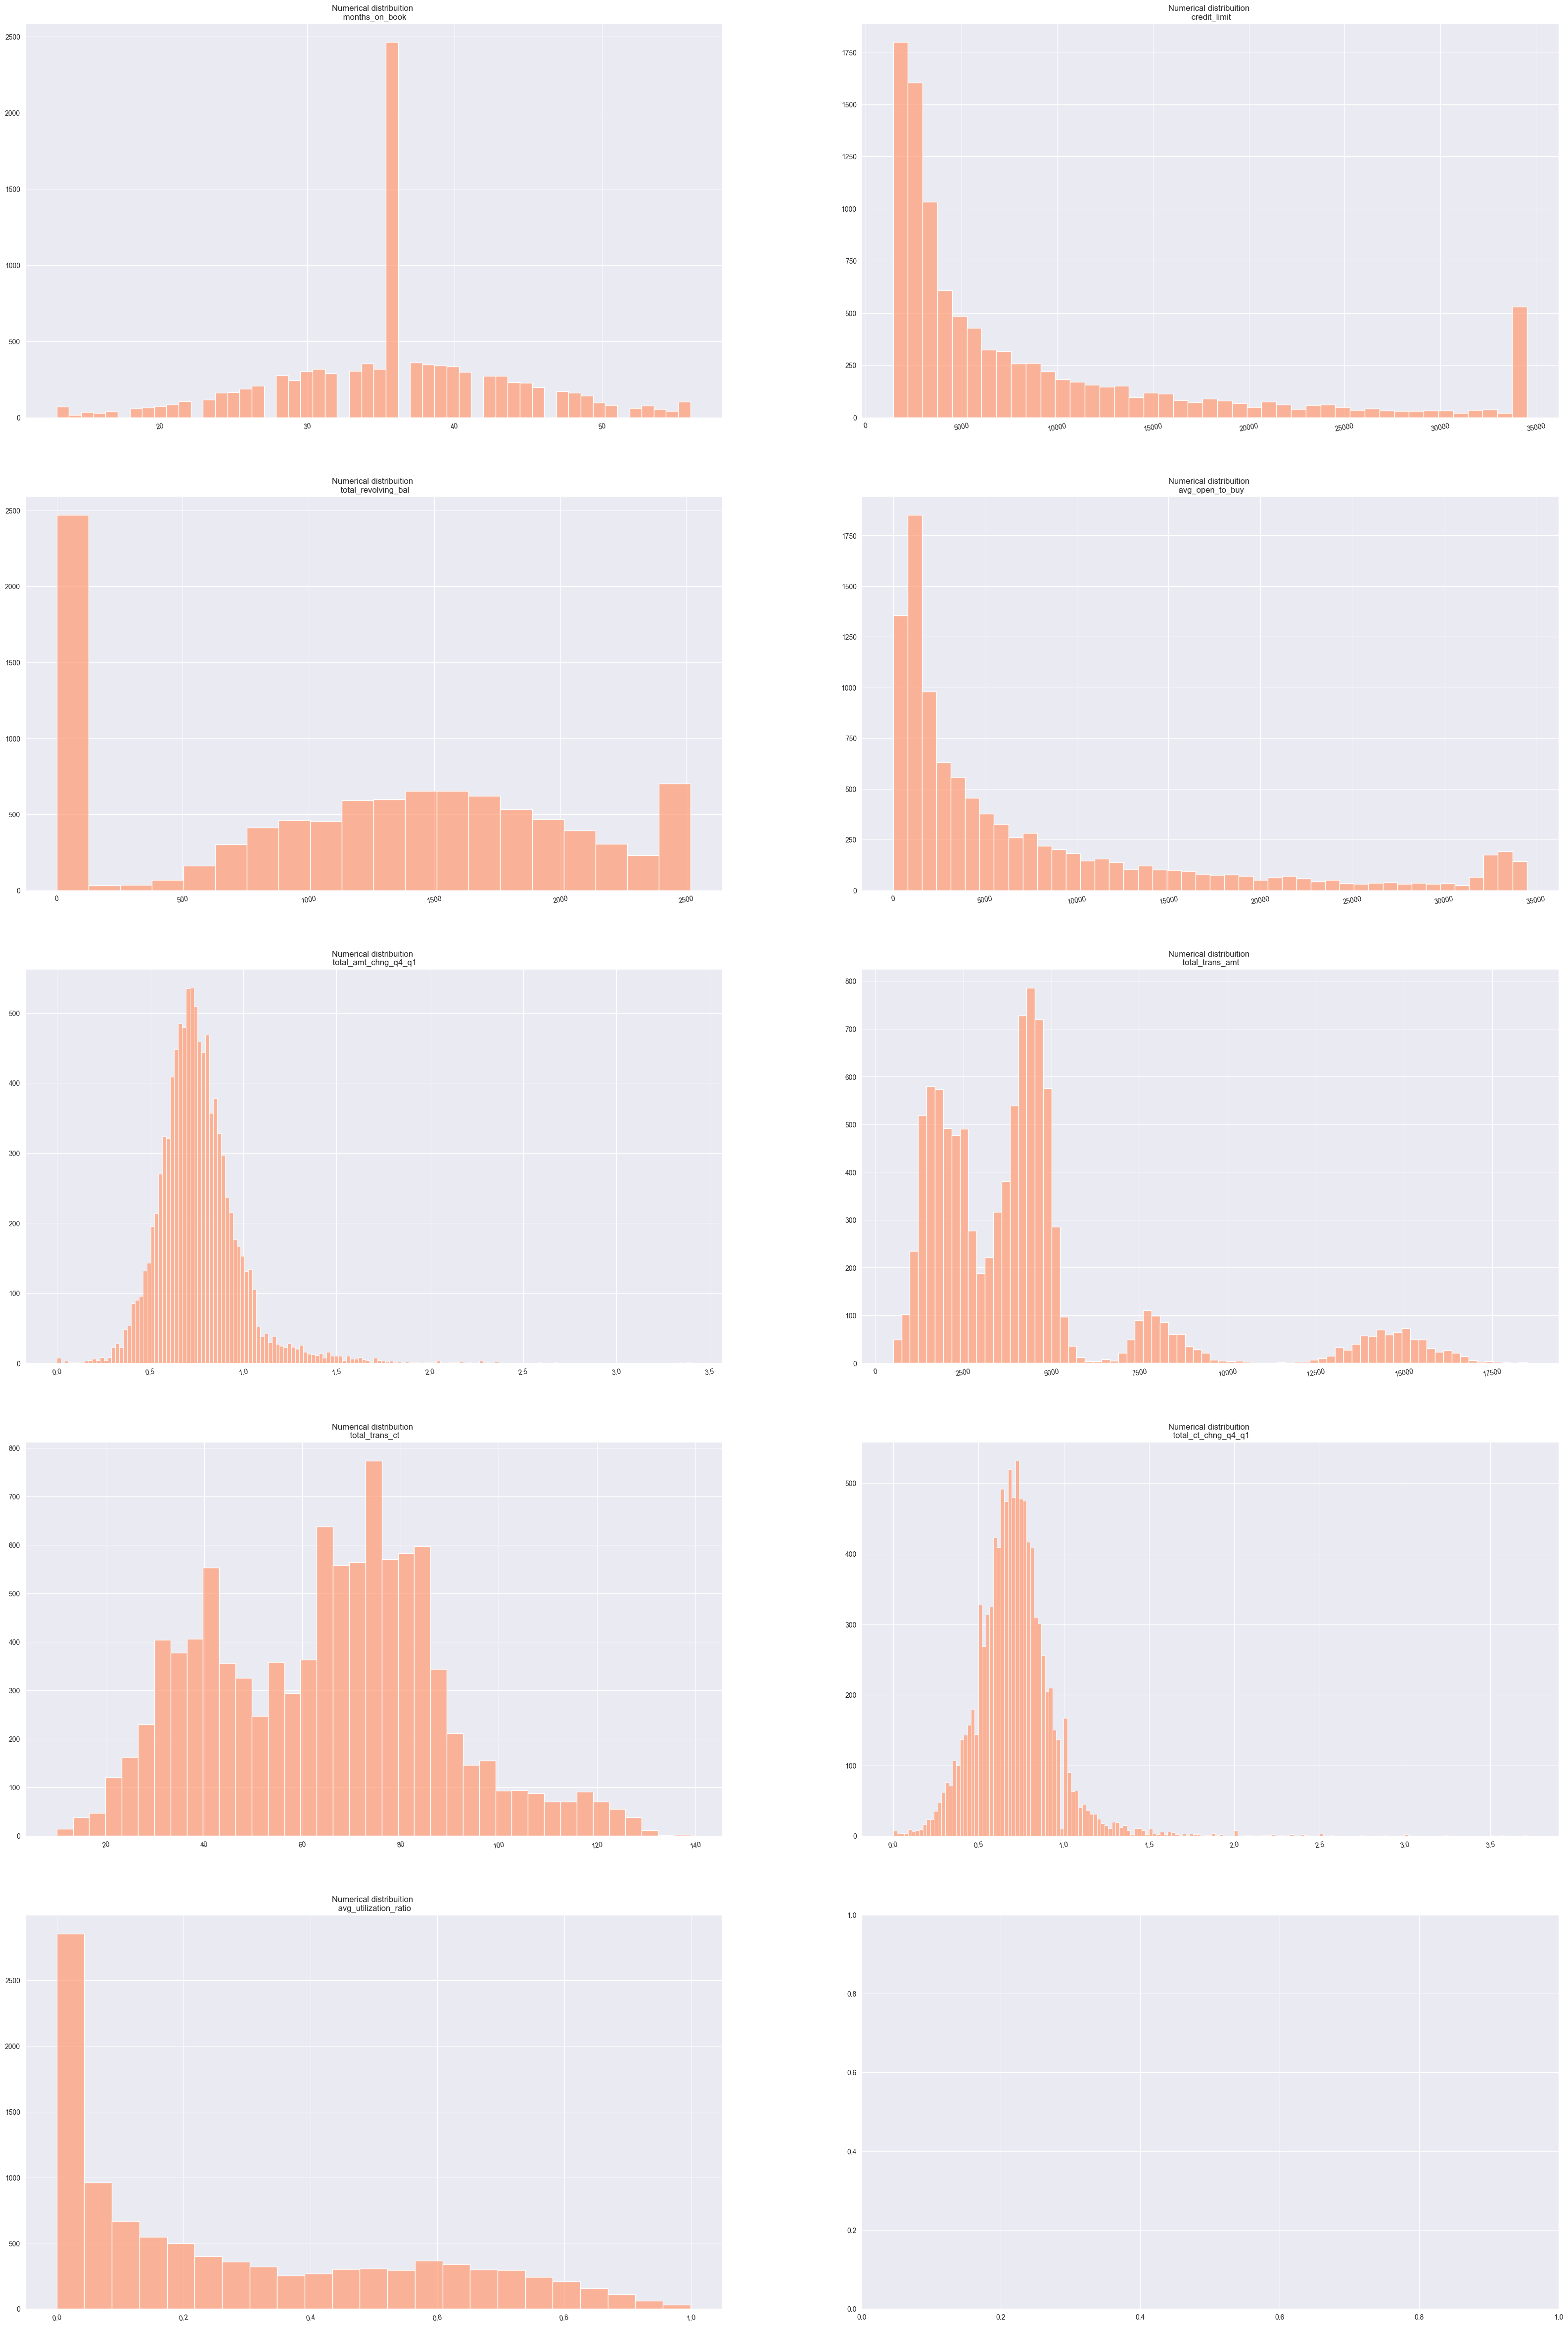

In [ ]:
distribuition_subplot_num(df, num, None)

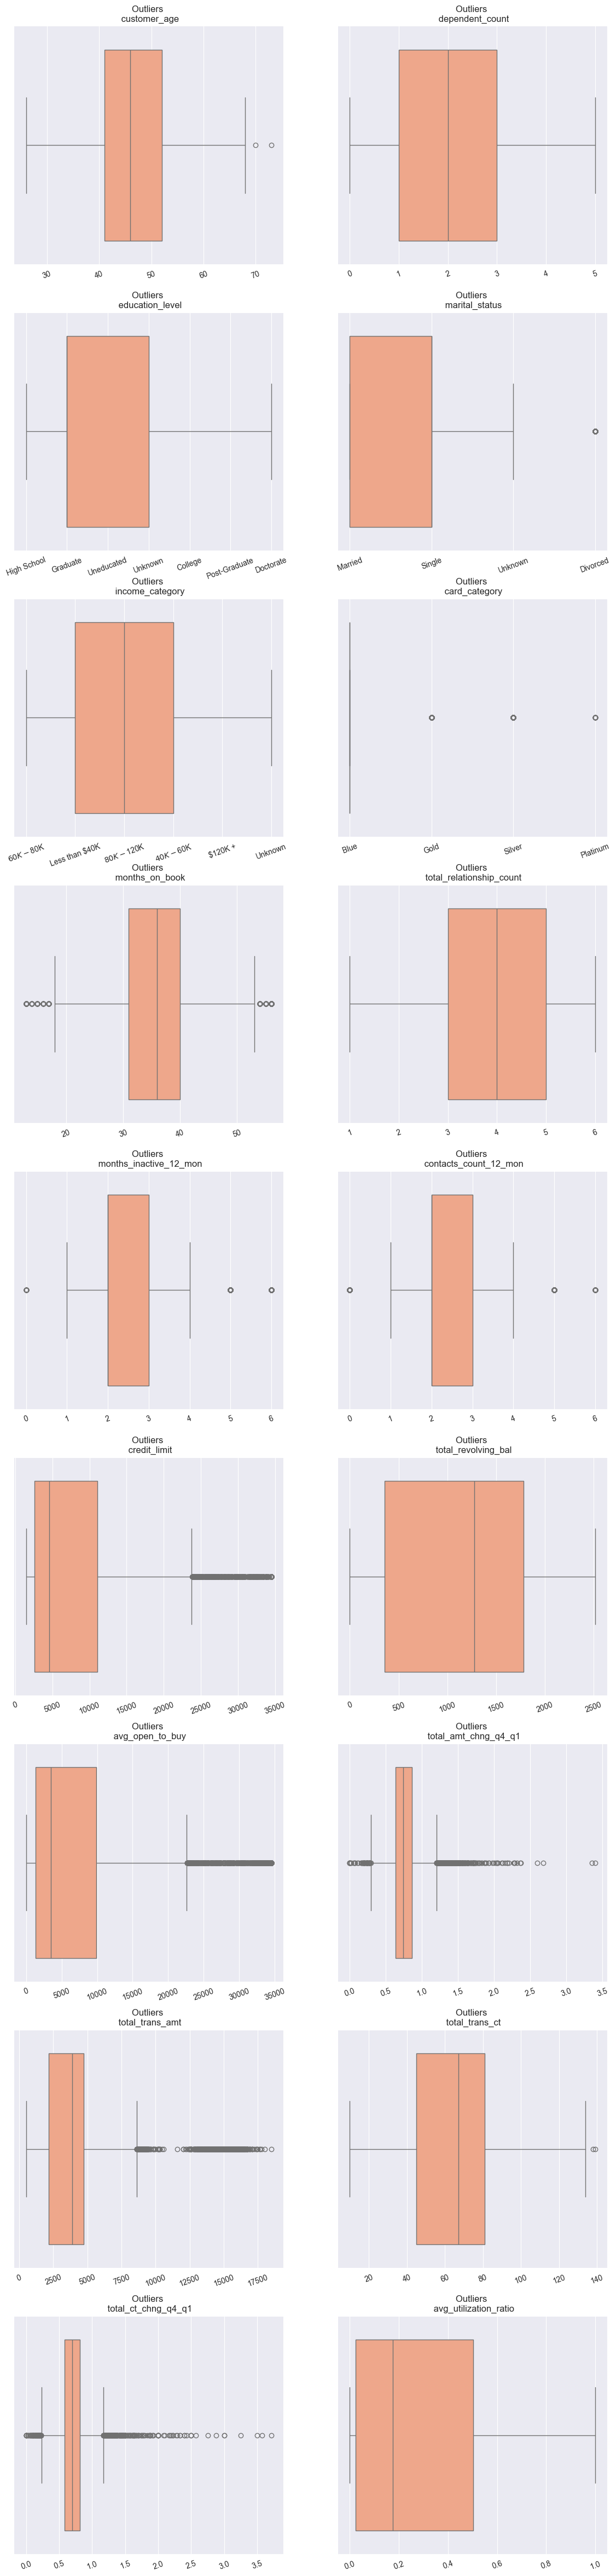

In [21]:
cols = df.drop(['attrition_flag', 'gender'], axis=1)

def outliers_subplot(df, col, hue):
    palette = ['#ffa07a', '#b8336a']
    plt.subplots(9,2, figsize=(14, 60))
    for i in enumerate(col):
        plt.subplot(9, 2, i[0]+1)
        sns.boxplot(data=df, x=i[1], color='lightsalmon', palette=palette, hue=hue)
        plt.xticks(rotation=20)
        plt.title(f'Outliers \n {i[1]}')
        plt.xlabel(None)
        plt.ylabel(None)
    plt.show()

outliers_subplot(df, cols, None)

### Subseting regular clients and churned clients

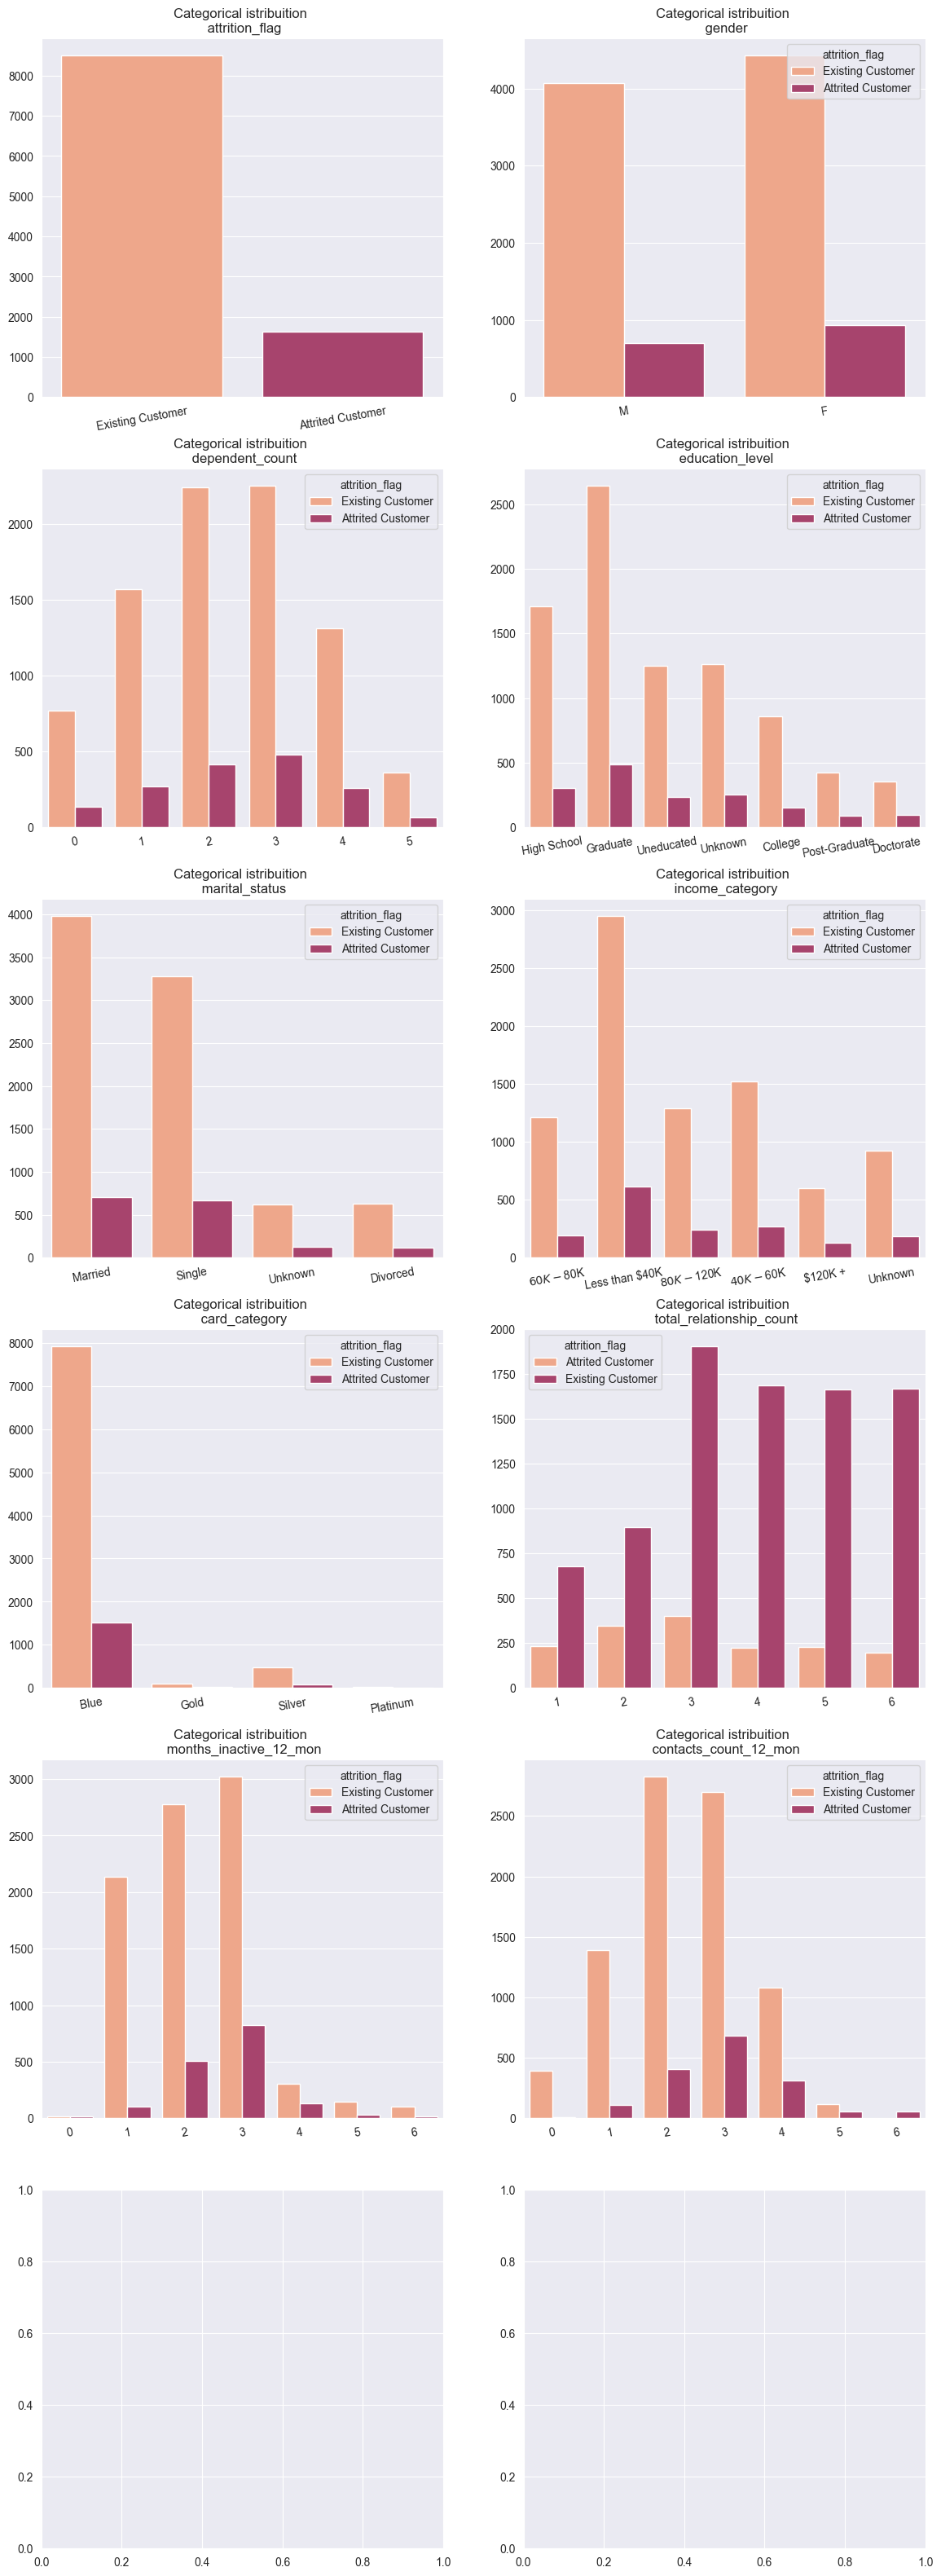

In [22]:
distribuition_subplot_cat(df, cat, 'attrition_flag')

The distribuition pattern looks similar in both cases. A couple of obserbations:
- There are more women who churned compared to men.
- The amount of married and singles who churned is very symilar. For the regular clients, married group is larger than the single group

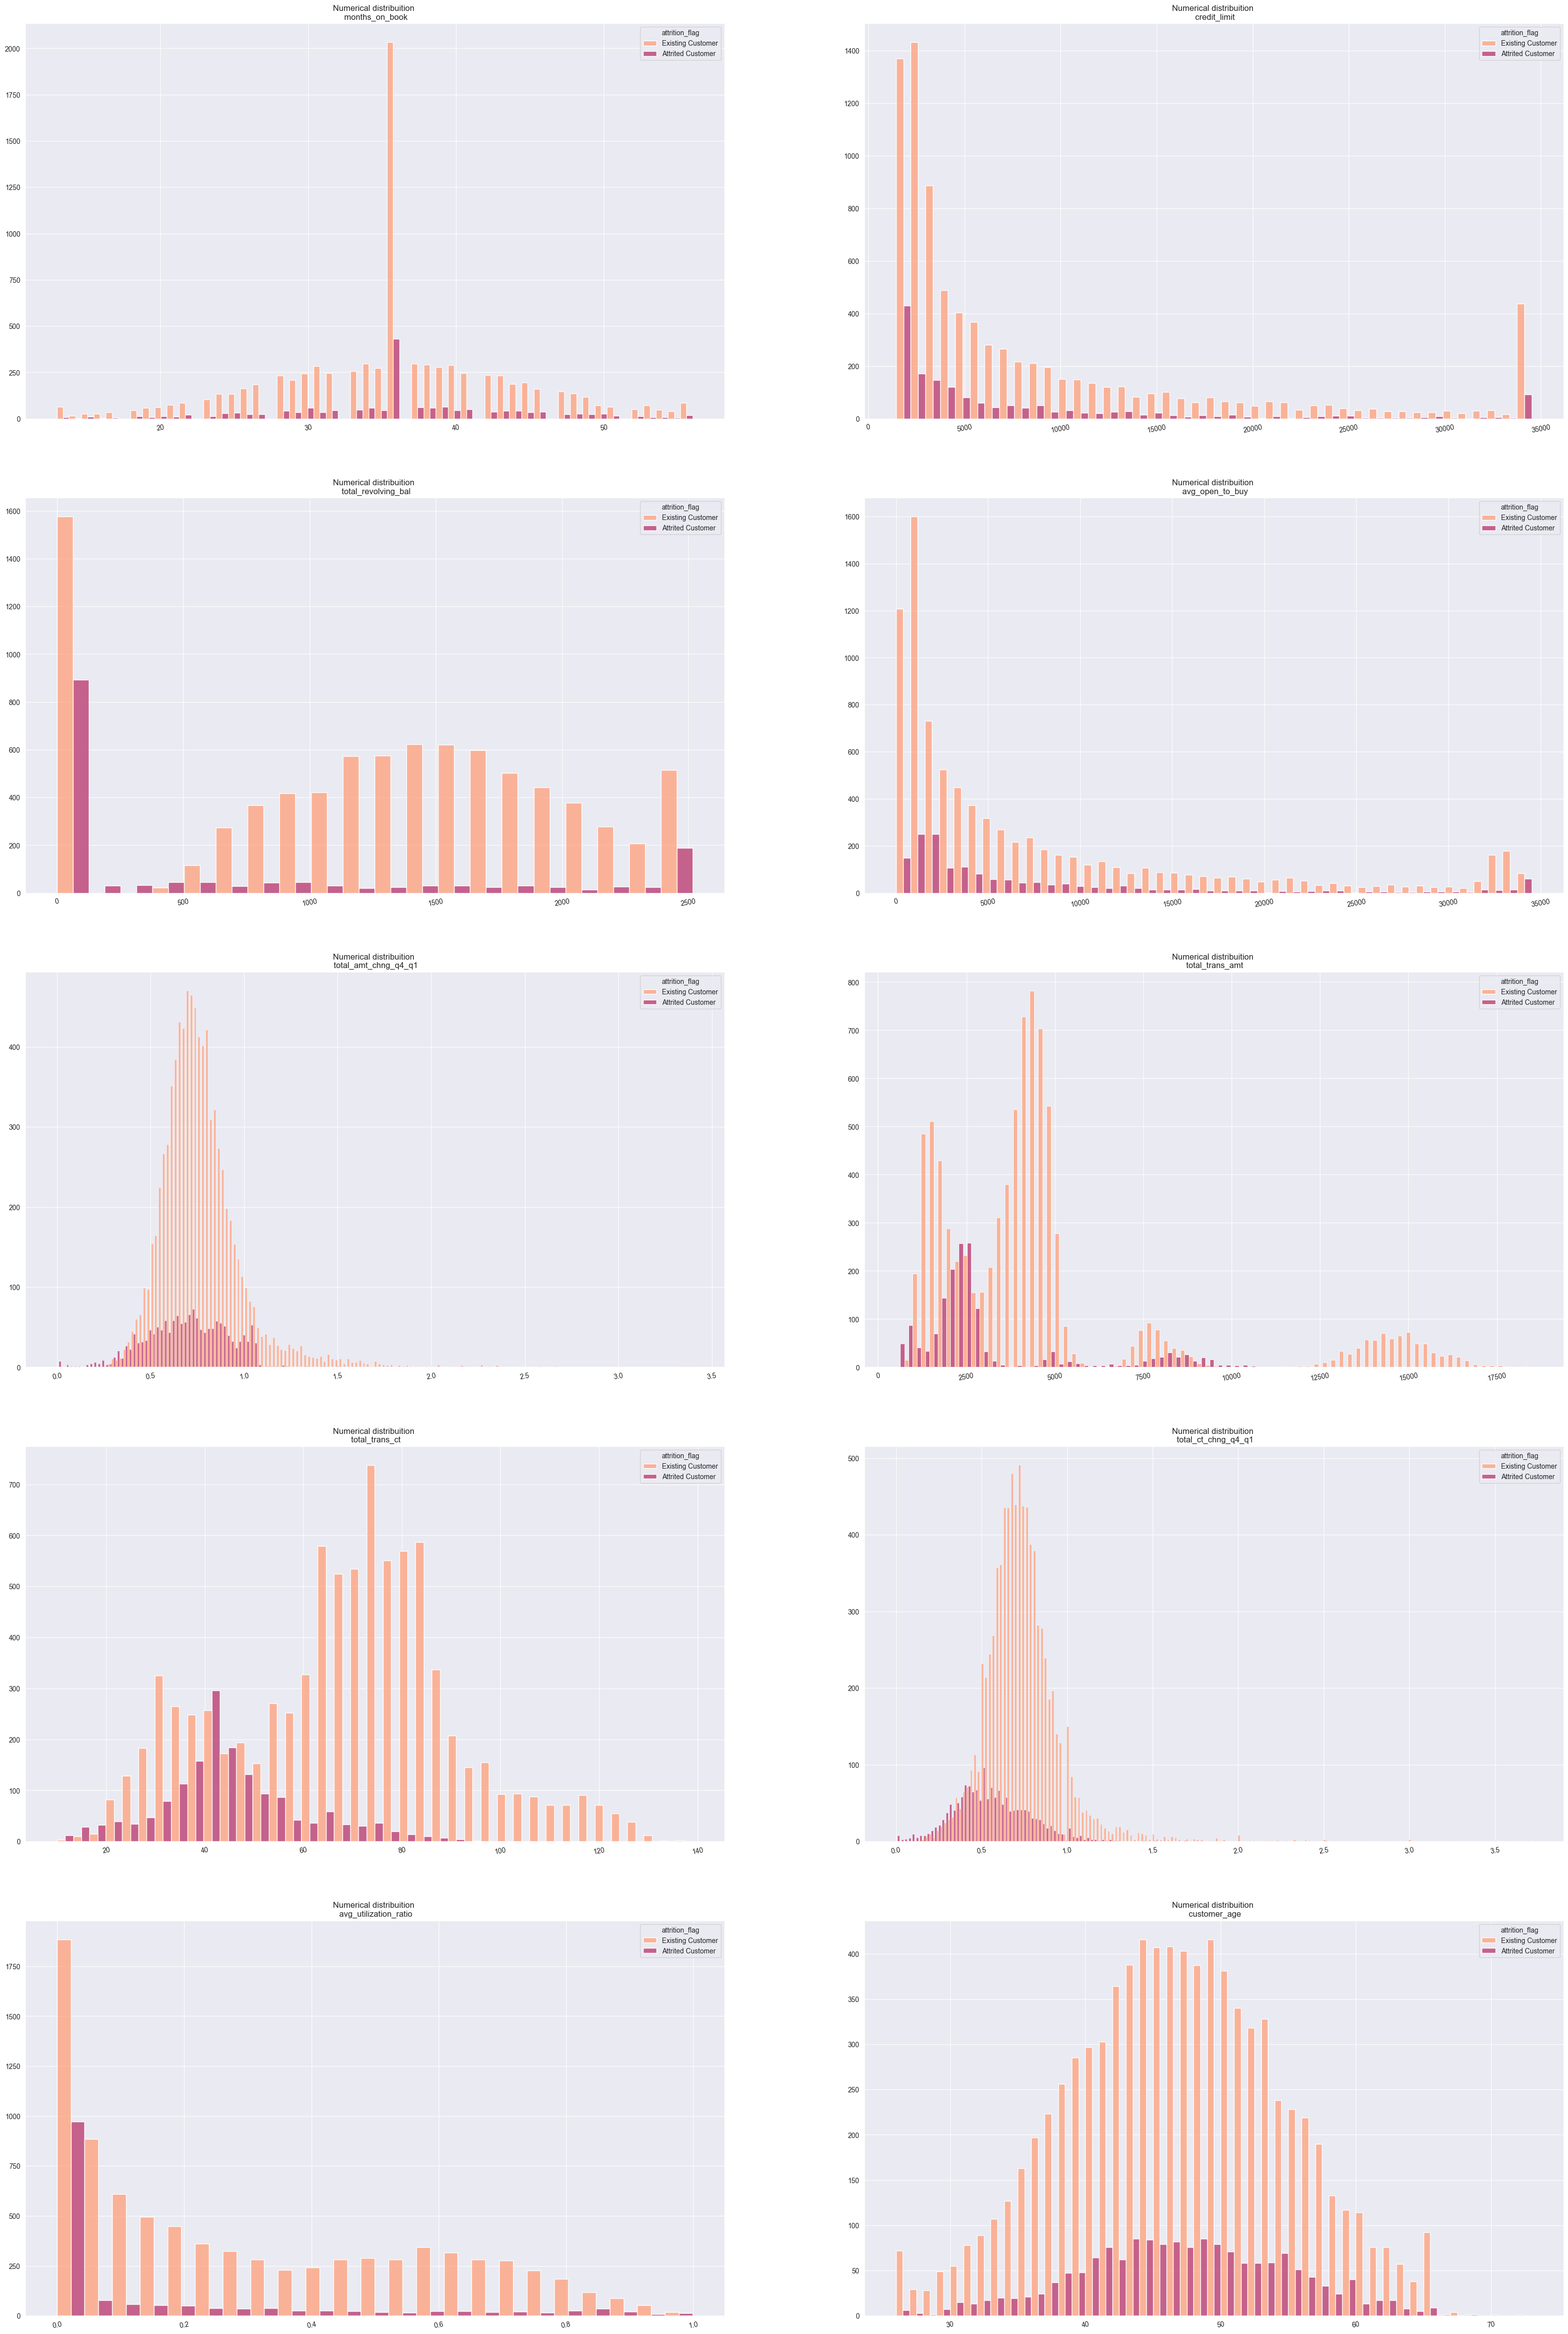

In [23]:
distribuition_subplot_num(df, num, 'attrition_flag')

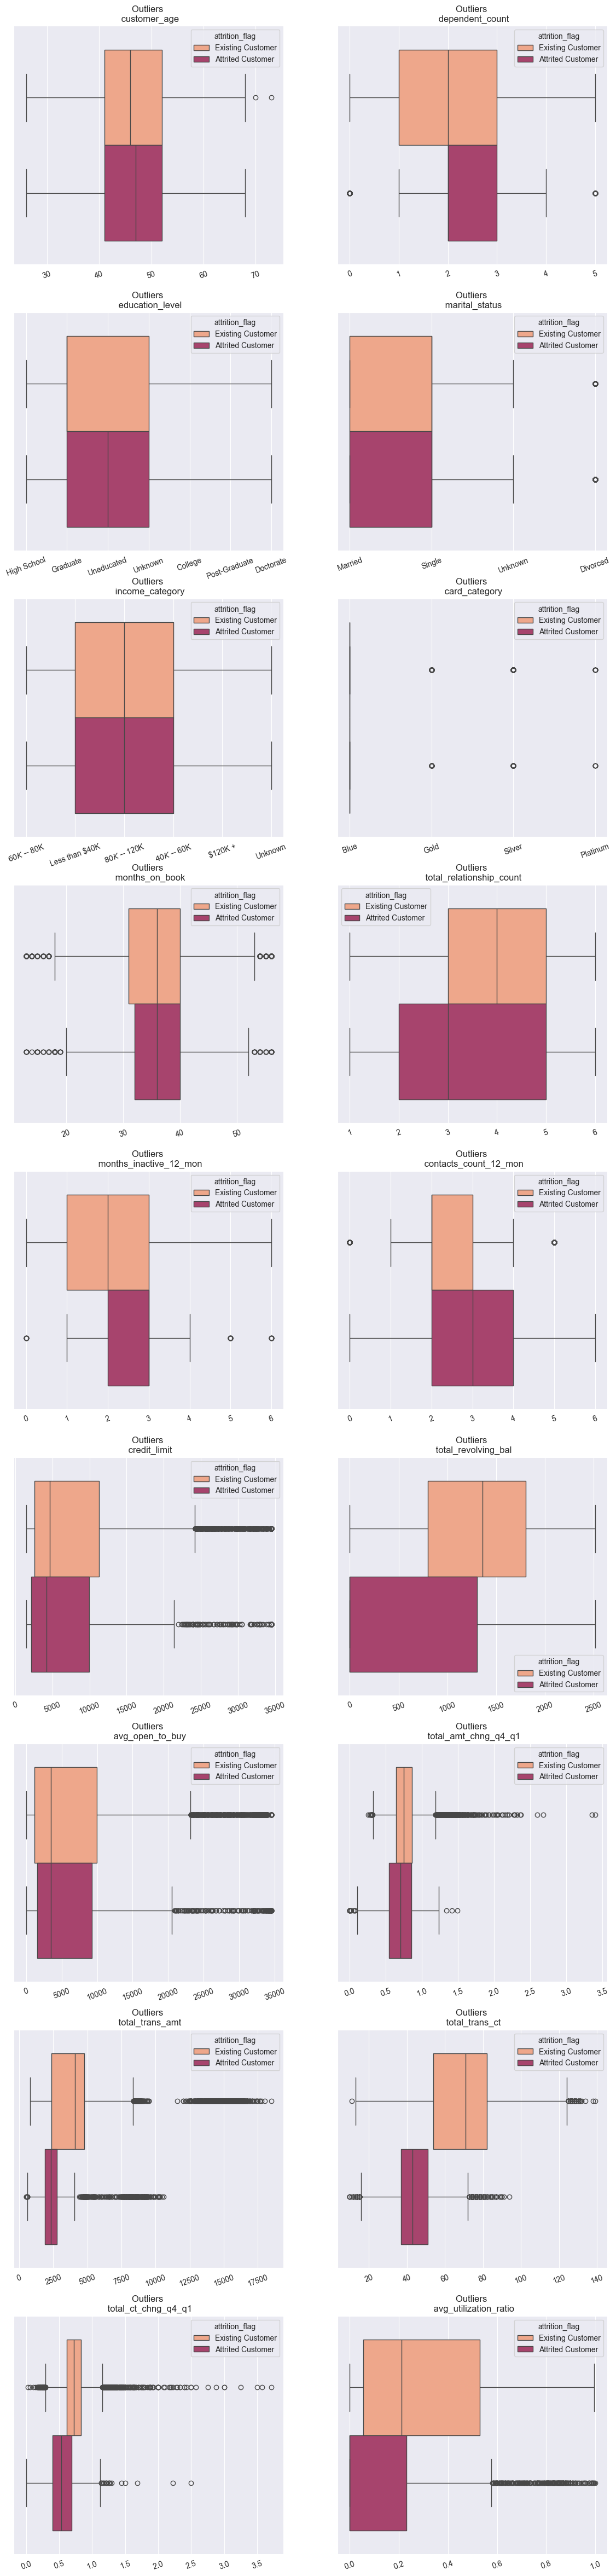

In [24]:
outliers_subplot(df, cols, 'attrition_flag')

#### Correlations

For this I will convert categorical data into numerical data

In [ ]:
# Mapping binary style columns with two unique values

df['gender'] = df['gender'].map({'F': 0, 'M': 1})
df['attrition_flag'] = df['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [ ]:
# Getting Dummies for the rest of categorical values

dummy_edu= pd.get_dummies(data=df['education_level'], drop_first=True, prefix='edu')
dummy_mari= pd.get_dummies(data=df['marital_status'], drop_first=True, prefix='status')
dummy_incom= pd.get_dummies(data=df['income_category'], drop_first=True, prefix='income')
dummy_card= pd.get_dummies(data=df['card_category'], drop_first=True, prefix='card')                                             

In [ ]:
df_num = pd.concat([df, dummy_mari, dummy_edu, dummy_card, dummy_incom], axis=1)
df_num.drop(['education_level', 'marital_status', 'income_category', 'card_category'], axis=1, inplace=True)
df_num.columns = df_num.columns.str.lower()
df_num.head()

,attrition_flag,customer_age,gender,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,...,edu_uneducated,edu_unknown,card_gold,card_platinum,card_silver,income_$40k - $60k,income_$60k - $80k,income_$80k - $120k,income_less than $40k,income_unknown
0,0,45,1,3,39,5,1,3,12691.0,777,...,False,False,False,False,False,False,True,False,False,False
1,0,49,0,5,44,6,1,2,8256.0,864,...,False,False,False,False,False,False,False,False,True,False
2,0,51,1,3,36,4,1,0,3418.0,0,...,False,False,False,False,False,False,False,True,False,False
3,0,40,0,4,34,3,4,1,3313.0,2517,...,False,False,False,False,False,False,False,False,True,False
4,0,40,1,3,21,5,1,0,4716.0,0,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
# Correlations

cols_corr = df_num.drop(['attrition_flag'], axis=1)

def corr_plot(df, target):
        corr = df.corrwith(target)
        corr = corr[corr!=1]
        corr.plot.bar(
                figsize = (20, 10), 
                fontsize = 15, 
                color = 'lightsalmon',
                rot = 45)
        plt.title('Correlation with Churn Rate \n')
        return plt.show()

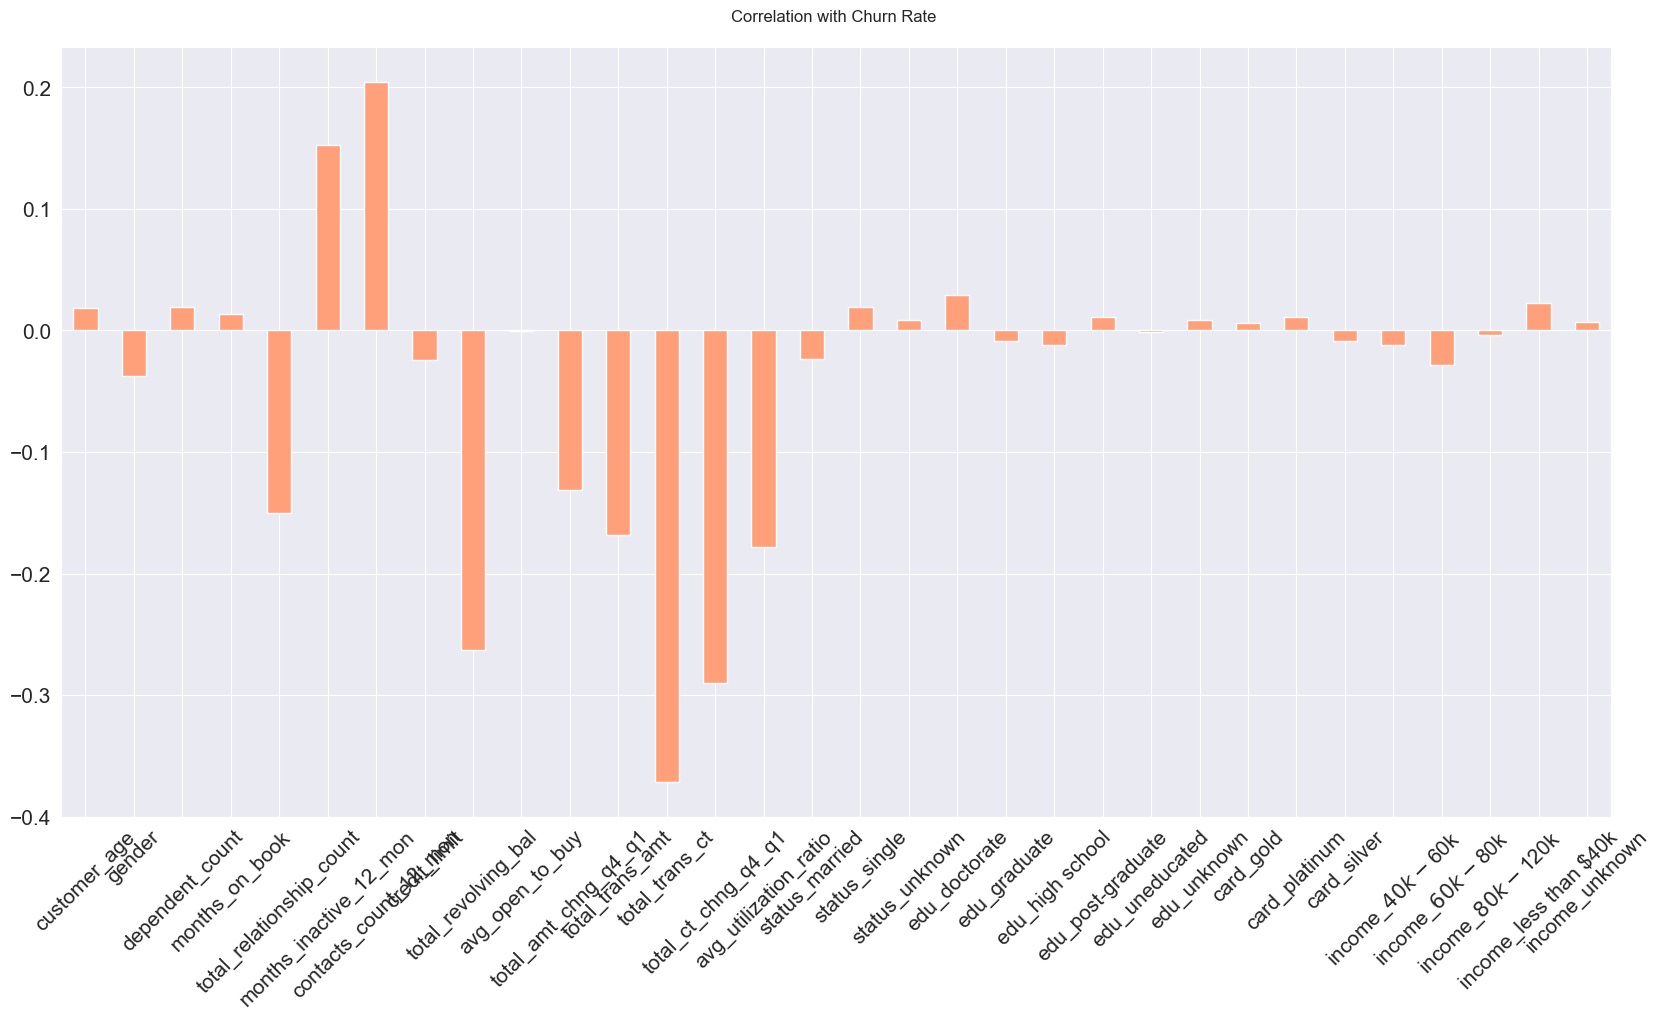

In [ ]:
corr_plot(cols_corr, df_num['attrition_flag'])

In [ ]:
df_num.to_csv('../data/clean/data_cleaned.csv', index=False)